# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

In [1]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import packages for data modeling
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


Exploratory Data Analysis (EDA) helps me understand the structure, quality, and relationships within the dataset before building a logistic regression model. The main purposes of EDA are:

To identify missing values, outliers, or incorrect data that might distort model results.

To understand data distributions and decide if any transformations or scaling are needed.

To examine relationships between independent variables and the dependent variable to see which features may be useful predictors.

To check for multicollinearity among predictors, since logistic regression assumes that independent variables are not highly correlated.

To select relevant features and remove unnecessary or redundant ones.

To gain insights and form hypotheses about which variables may influence the outcome.

Overall, EDA ensures data quality, model validity, and stronger interpretability of regression results.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [5]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [6]:
data.shape

(19382, 12)

Get the data types of the columns.

In [7]:
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [9]:
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [10]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [11]:
# Drop rows with missing values
data = data.dropna()

In [12]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [13]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

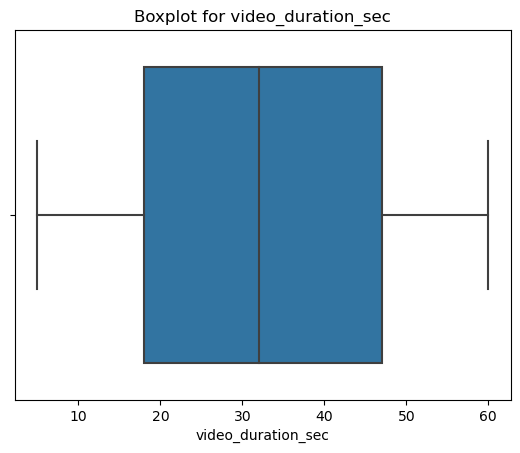

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['video_duration_sec'])
plt.title('Boxplot for video_duration_sec')
plt.show()


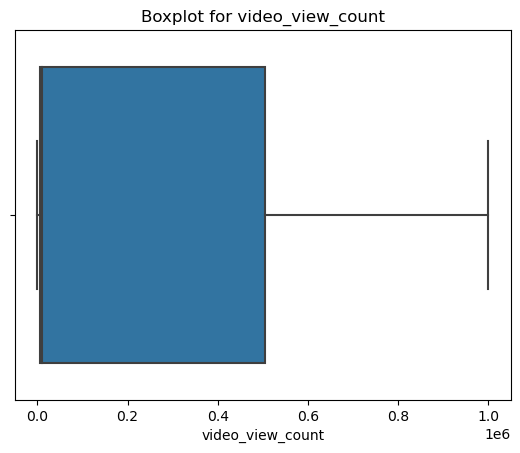

In [15]:
sns.boxplot(x=data['video_view_count'])
plt.title('Boxplot for video_view_count')
plt.show()


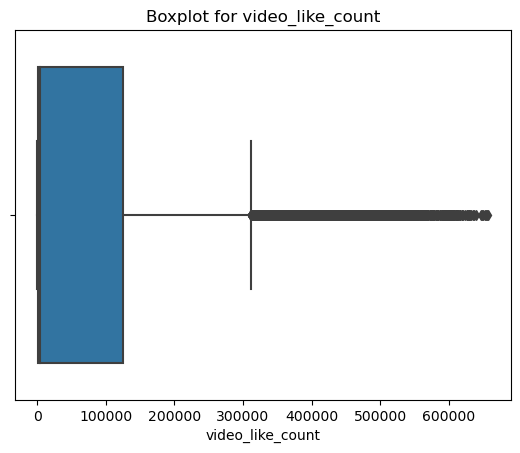

In [16]:
sns.boxplot(x=data['video_like_count'])
plt.title('Boxplot for video_like_count')
plt.show()

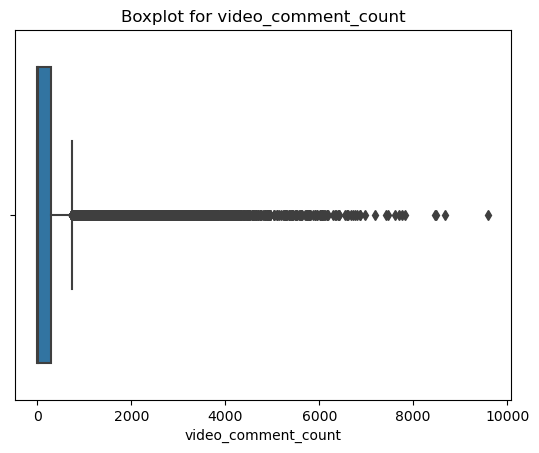

In [17]:
sns.boxplot(x=data['video_comment_count'])
plt.title('Boxplot for video_comment_count')
plt.show()


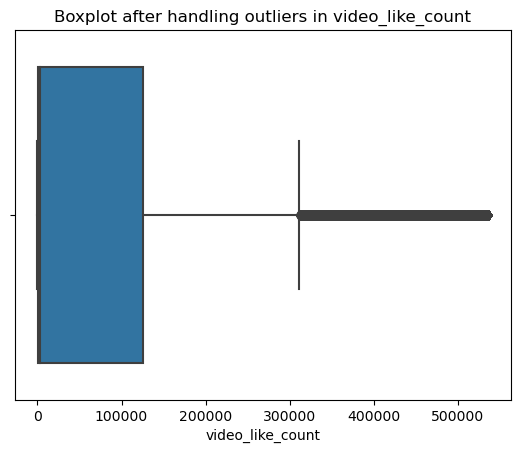

In [18]:
# Calculate 1st and 99th percentile
lower_bound = data['video_like_count'].quantile(0.01)
upper_bound = data['video_like_count'].quantile(0.99)

# Cap outliers
data['video_like_count'] = data['video_like_count'].clip(lower=lower_bound, upper=upper_bound)

# Verify after handling outliers
sns.boxplot(x=data['video_like_count'])
plt.title('Boxplot after handling outliers in video_like_count')
plt.show()


Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [19]:
# Check class balance
data['verified_status'].value_counts(normalize=True)


verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [20]:
from sklearn.utils import resample

# Identify majority and minority classes
majority_class = data[data['verified_status'] == 'not verified']
minority_class = data[data['verified_status'] == 'verified']

# Upsample minority class (verified)
minority_upsampled = resample(minority_class,
                              replace=True,          # Sample with replacement
                              n_samples=len(majority_class),  # Match majority size
                              random_state=42)

# Combine majority class with upsampled minority class
data_balanced = pd.concat([majority_class, minority_upsampled])

# Display new class counts
print(data_balanced['verified_status'].value_counts())


verified_status
not verified    17884
verified        17884
Name: count, dtype: int64


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [21]:
# Make a copy if you prefer to keep the original intact
# data = data.copy()

# Create a length column (characters). Use words instead with .str.split().str.len()
data['transcript_len'] = data['video_transcription_text'].fillna('').str.len()

# Average length for verified vs not verified
avg_len_by_verified = (
    data.groupby('verified_status')['transcript_len']
        .mean()
        .rename('avg_transcript_len')
        .sort_values(ascending=False)
)
print(avg_len_by_verified)

# (Optional) If your notebook asks for claims vs opinions instead:
if 'claim_status' in data.columns:
    avg_len_by_claim_status = (
        data.groupby('claim_status')['transcript_len']
            .mean()
            .rename('avg_transcript_len')
            .sort_values(ascending=False)
    )
    print("\nAverage transcript length by claim_status:")
    print(avg_len_by_claim_status)


verified_status
not verified    89.401141
verified        84.509167
Name: avg_transcript_len, dtype: float64

Average transcript length by claim_status:
claim_status
claim      95.376978
opinion    82.722562
Name: avg_transcript_len, dtype: float64


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [24]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['transcript_len'] = data['video_transcription_text'].fillna('').str.len()


In [25]:
# Display first few rows of dataframe after adding new column
data[['video_transcription_text', 'transcript_len']].head()


,video_transcription_text,transcript_len
0,someone shared with me that drone deliveries a...,97
1,someone shared with me that there are more mic...,107
2,someone shared with me that american industria...,137
3,someone shared with me that the metro of st. p...,131
4,someone shared with me that the number of busi...,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

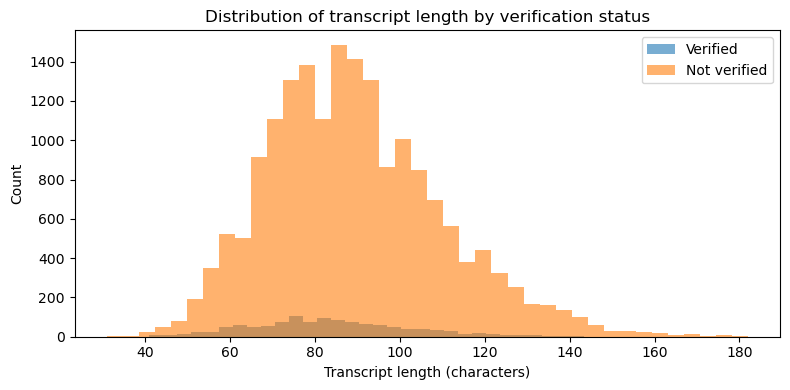

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

verified_mask = data['verified_status'] == 'verified'
data.loc[verified_mask, 'transcript_len'].plot(
    kind='hist', bins=40, alpha=0.6, label='Verified', ax=ax
)
data.loc[~verified_mask, 'transcript_len'].plot(
    kind='hist', bins=40, alpha=0.6, label='Not verified', ax=ax
)

ax.set_xlabel('Transcript length (characters)')
ax.set_ylabel('Count')
ax.set_title('Distribution of transcript length by verification status')
ax.legend()
plt.tight_layout()
plt.show()


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [27]:
# Code a correlation matrix to help determine most correlated variables
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_len
#,1.000000,-0.003590,-0.000145,-0.668047,-0.544381,-0.451713,-0.447729,-0.377445,-0.226844
video_id,-0.003590,1.000000,0.008460,0.000217,0.000075,-0.002721,0.002155,0.005336,0.000723
video_duration_sec,-0.000145,0.008460,1.000000,0.008481,0.011324,0.011560,0.013078,0.000615,-0.001580
video_view_count,-0.668047,0.000217,0.008481,1.000000,0.806799,0.665635,0.664222,0.554172,0.230212
video_like_count,-0.544381,0.000075,0.011324,0.806799,1.000000,0.824991,0.823386,0.687379,0.181220
video_share_count,-0.451713,-0.002721,0.011560,0.665635,0.824991,1.000000,0.679910,0.574632,0.147223
video_download_count,-0.447729,0.002155,0.013078,0.664222,0.823386,0.679910,1.000000,0.832464,0.146382
video_comment_count,-0.377445,0.005336,0.000615,0.554172,0.687379,0.574632,0.832464,1.000000,0.129659
transcript_len,-0.226844,0.000723,-0.001580,0.230212,0.181220,0.147223,0.146382,0.129659,1.000000


Visualize a correlation heatmap of the data.

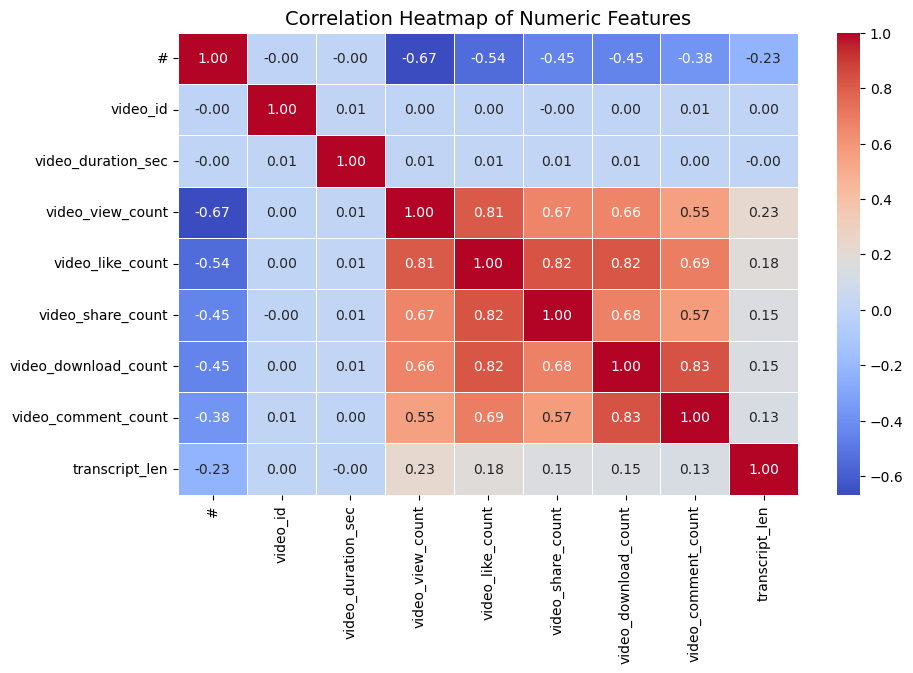

In [28]:
# Create a heatmap to visualize how correlated variables are
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

The heatmap shows strong positive correlations among the engagement metrics:

video_view_count, video_like_count, video_share_count, video_download_count, and video_comment_count.

These variables are all highly correlated with each other (correlation coefficients typically between 0.65 and 0.83), meaning that as one increases, the others tend to increase as well.

In contrast, video_duration_sec and transcript_len show very weak or negligible correlations with the engagement features, suggesting they provide independent information.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [29]:
# Select outcome variable
y = data_balanced['verified_status'].apply(lambda x: 1 if x == 'verified' else 0)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: verified_status, dtype: int64

In [31]:
data_balanced.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

Select the features.

In [34]:
X = data_balanced[['video_duration_sec', 'video_like_count', 'video_comment_count']]
X.head()

,video_duration_sec,video_like_count,video_comment_count
0,59,19425.0,0.0
1,32,77355.0,684.0
2,31,97690.0,329.0
3,25,239954.0,584.0
4,19,34987.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Confirm that the dimensions of the training and testing sets are in alignment.

In [36]:
# Get shape of each training and testing set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25037, 3)
X_test shape: (10731, 3)
y_train shape: (25037,)
y_test shape: (10731,)


### **Task 3c. Encode variables**

Check the data types of the features.

In [37]:
# Check data types
data_balanced.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [38]:
# Get unique values in `claim_status`
data_balanced['claim_status'].unique()


array(['claim', 'opinion'], dtype=object)

In [39]:
# Get unique values in `author_ban_status`
data_balanced['author_ban_status'].unique()


array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [40]:
# Select the categorical columns from X_train (object dtype)
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# If you prefer to be explicit, uncomment the next line:
# cat_cols = ['claim_status', 'author_ban_status']

X_train_cat = X_train[cat_cols].copy()
X_train_cat.head()


""
17338
12096
18070
13079
13270


In [41]:
# Set up an encoder for one-hot encoding the categorical features
from sklearn.preprocessing import OneHotEncoder

# drop='first' avoids multicollinearity; handle_unknown='ignore' keeps transform robust
ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')


In [42]:
# Fit and transform the training features using the encoder
X_train_cat_enc = ohe.fit_transform(X_train_cat)


/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# Get feature names from encoder
encoded_feature_names = ohe.get_feature_names_out(cat_cols)
encoded_feature_names


array([], dtype=object)

In [44]:
# Display first few rows of encoded training features
import pandas as pd

X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc, columns=encoded_feature_names, index=X_train.index)
X_train_cat_enc_df.head()

""
17338
12096
18070
13079
13270


In [45]:
# Place encoded training features (which is currently an array) into a dataframe
# Separate numeric part of X_train
X_train_num = X_train.drop(columns=cat_cols)

# Concatenate numeric features with the encoded categorical features
X_train_encoded = pd.concat([X_train_num, X_train_cat_enc_df], axis=1)

# Sanity check
X_train_encoded.head()

# Display first few rows
### YOUR CODE HERE ###


,video_duration_sec,video_like_count,video_comment_count
17338,14,1247.0,0.0
12096,34,411.0,0.0
18070,38,2035.0,10.0
13079,39,3417.0,11.0
13270,9,630.0,1.0


In [46]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
# Drop the categorical columns that were encoded
X_train_dropped = X_train.drop(columns=cat_cols)

# Display first few rows
X_train_dropped.head()

,video_duration_sec,video_like_count,video_comment_count
17338,14,1247.0,0.0
12096,34,411.0,0.0
18070,38,2035.0,10.0
13079,39,3417.0,11.0
13270,9,630.0,1.0


In [47]:
# Reset index on both dataframes so they align
X_train_dropped = X_train_dropped.reset_index(drop=True)
X_train_cat_enc_df = X_train_cat_enc_df.reset_index(drop=True)

# Concatenate numeric + encoded categorical features
X_train_final = pd.concat([X_train_dropped, X_train_cat_enc_df], axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_like_count,video_comment_count
0,14,1247.0,0.0
1,34,411.0,0.0
2,38,2035.0,10.0
3,39,3417.0,11.0
4,9,630.0,1.0


Check the data type of the outcome variable.

In [48]:
# Check data type of outcome variable
y_train.dtypes

dtype('int64')

In [49]:
# Get unique values of outcome variable
y_train.unique()


array([1, 0])

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [50]:
# Set up an encoder for one-hot encoding the categorical outcome variable
print("No encoding needed. y_train is already numeric.")

No encoding needed. y_train is already numeric.


In [51]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize encoder
ohe_y = OneHotEncoder(drop='if_binary', sparse_output=False)

# Fit and transform the training outcome variable
y_train_encoded = ohe_y.fit_transform(y_train.values.reshape(-1, 1))

# Flatten for modeling (optional)
y_train_encoded = y_train_encoded.ravel()

# Display encoded training outcome variable
pd.DataFrame(y_train_encoded).head()

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Logistic Regression pipeline: scale -> fit LR
logreg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        class_weight="balanced",   # helps with any residual class imbalance
        random_state=42
    ))
])

# Fit to the training data
logreg_clf.fit(X_train_final, y_train)

print("Model trained. n_features:", X_train_final.shape[1])


Model trained. n_features: 3


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [54]:
X_test.columns

Index(['video_duration_sec', 'video_like_count', 'video_comment_count'], dtype='object')

In [55]:
# Use the same columns that were used for training
numeric_cols = ['video_duration_sec', 'video_like_count', 'video_comment_count']
X_test_final = X_test[numeric_cols].copy()

# Predict and evaluate
y_pred  = logreg_clf.predict(X_test_final)
y_proba = logreg_clf.predict_proba(X_test_final)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy : 0.6260367160562855
Precision: 0.583498023715415
Recall   : 0.8805219012115564
F1 Score : 0.7018795037515786

Confusion matrix:
 [[1994 3372]
 [ 641 4724]]

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.37      0.50      5366
           1       0.58      0.88      0.70      5365

    accuracy                           0.63     10731
   macro avg       0.67      0.63      0.60     10731
weighted avg       0.67      0.63      0.60     10731



In [59]:
 #---- Transform the testing features using the (already fit) encoder ----
import numpy as np
import pandas as pd

# Categorical columns you used on the train side
cat_cols = ['claim_status', 'author_ban_status']

# Select whatever categorical cols are actually present in X_test
present_cat = [c for c in cat_cols if c in X_test.columns]
X_test_cat = X_test[present_cat] if present_cat else pd.DataFrame(index=X_test.index)

# Transform with the encoder you fitted on the train set (ohe)
if present_cat:
    # if the encoder was fit before:
    X_test_cat_enc = ohe.transform(X_test_cat)
    # get names if available (sklearn >= 1.0)
    try:
        enc_names = ohe.get_feature_names_out(present_cat)
    except:
        enc_names = []
else:
    # no categorical columns → empty encoded matrix
    X_test_cat_enc = np.empty((len(X_test), 0))
    enc_names = []

# ---- Display first few rows of encoded testing features ----
pd.DataFrame(X_test_cat_enc, columns=enc_names, index=X_test.index).head()


""
9644
18421
5541
12910
18850


In [60]:
# ---- Place encoded testing features (array) into a dataframe ----
X_test_cat_enc_df = pd.DataFrame(
    X_test_cat_enc, columns=enc_names, index=X_test.index
)

# Numeric part of X_test (drop categorical columns if they exist)
X_test_num = X_test.drop(columns=present_cat) if present_cat else X_test.copy()

# Concatenate numeric + encoded categorical features
X_test_final = pd.concat([X_test_num, X_test_cat_enc_df], axis=1)

# ---- Display first few rows of the final test set ----
X_test_final.head()


,video_duration_sec,video_like_count,video_comment_count
9644,37,13.0,0.0
18421,24,13.0,0.0
5541,8,254462.0,1232.0
12910,44,1484.0,6.0
18850,40,506.0,3.0


In [61]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=present_cat).head()


,video_duration_sec,video_like_count,video_comment_count
9644,37,13.0,0.0
18421,24,13.0,0.0
5541,8,254462.0,1232.0
12910,44,1484.0,6.0
18850,40,506.0,3.0


In [62]:
# Concatenate numeric and (if present) encoded categorical features
X_test_num   = X_test.drop(columns=present_cat) if present_cat else X_test.copy()
X_test_final = pd.concat([X_test_num, X_test_cat_enc_df], axis=1)

# Sanity check
X_test_final.head()

,video_duration_sec,video_like_count,video_comment_count
9644,37,13.0,0.0
18421,24,13.0,0.0
5541,8,254462.0,1232.0
12910,44,1484.0,6.0
18850,40,506.0,3.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [63]:
# Predict class labels and probabilities on the test set
y_pred  = logreg_clf.predict(X_test_final)
y_proba = logreg_clf.predict_proba(X_test_final)[:, 1]  # probability of class 1

# Peek at the first few predictions
pd.Series(y_pred, index=X_test_final.index, name="y_pred").head()

9644     1
18421    1
5541     0
12910    1
18850    1
Name: y_pred, dtype: int64

Display the predictions on the encoded testing set.

In [64]:
pred_df = pd.DataFrame(
    {"y_pred": y_pred, "p(verified=1)": y_proba},
    index=X_test_final.index
)
pred_df.head()


,y_pred,p(verified=1)
9644,1,0.566885
18421,1,0.575402
5541,0,0.261679
12910,1,0.560295
18850,1,0.564265


Display the true labels of the testing set.

In [65]:
# If needed, align the index with X_test_final
y_test_aligned = y_test.reset_index(drop=True)

pd.Series(y_test_aligned, name="y_true").head()

0    0
1    1
2    0
3    0
4    0
Name: y_true, dtype: int64

Encode the true labels of the testing set so it can be compared to the predictions.

In [66]:
# Encode the testing outcome variable
y_test_encoded = ohe_y.transform(y_test.values.reshape(-1, 1))

# Flatten the array for easier comparison with predictions
y_test_encoded = y_test_encoded.ravel()

# Display the encoded testing outcome variable
pd.Series(y_test_encoded, name="y_test_encoded").head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: y_test_encoded, dtype: float64

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [67]:
# Get shape of each training and testing set
print("X_train_final shape:", X_train_final.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_test_encoded shape:", y_test_encoded.shape)


X_train_final shape: (25037, 3)
y_train_encoded shape: (25037,)
X_test_final shape: (10731, 3)
y_test_encoded shape: (10731,)


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate model performance
print("Accuracy :", accuracy_score(y_test_encoded, y_pred))
print("Precision:", precision_score(y_test_encoded, y_pred))
print("Recall   :", recall_score(y_test_encoded, y_pred))
print("F1 Score :", f1_score(y_test_encoded, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

Accuracy : 0.6260367160562855
Precision: 0.583498023715415
Recall   : 0.8805219012115564
F1 Score : 0.7018795037515786

Confusion Matrix:
 [[1994 3372]
 [ 641 4724]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.37      0.50      5366
         1.0       0.58      0.88      0.70      5365

    accuracy                           0.63     10731
   macro avg       0.67      0.63      0.60     10731
weighted avg       0.67      0.63      0.60     10731



### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

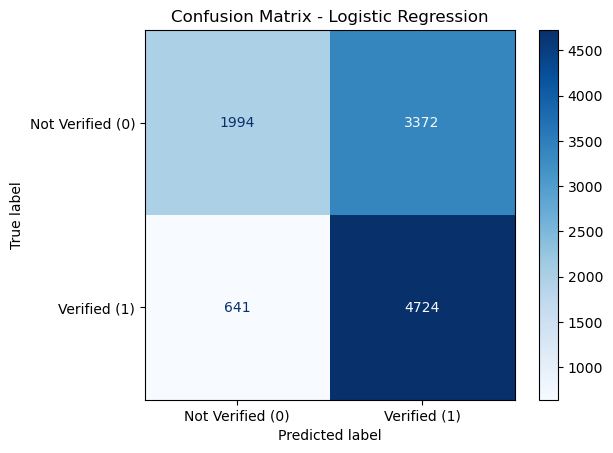

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute values for confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Verified (0)", "Verified (1)"])

# Plot confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Display plot
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [70]:
from sklearn.metrics import classification_report

# Create a classification report
report = classification_report(y_test_encoded, y_pred, target_names=["Not Verified (0)", "Verified (1)"])
print("Classification Report:\n")
print(report)

Classification Report:

                  precision    recall  f1-score   support

Not Verified (0)       0.76      0.37      0.50      5366
    Verified (1)       0.58      0.88      0.70      5365

        accuracy                           0.63     10731
       macro avg       0.67      0.63      0.60     10731
    weighted avg       0.67      0.63      0.60     10731



### **Task 4c. Interpret model coefficients**

In [71]:
import pandas as pd

# Get feature names and coefficients from the logistic regression model
feature_names = X_train_final.columns
coefficients = logreg_clf.named_steps['logreg'].coef_[0]

# Combine into a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (log-odds)': coefficients
})

# Sort by absolute coefficient size to see strongest influences
coef_df['abs_coef'] = coef_df['Coefficient (log-odds)'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

# Display coefficients
print("Feature importance based on logistic regression coefficients:\n")
display(coef_df)

Feature importance based on logistic regression coefficients:



,Feature,Coefficient (log-odds)
1,video_like_count,-0.661654
2,video_comment_count,0.044316
0,video_duration_sec,-0.043222


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

Key takeaways from this project

A logistic regression model was successfully trained to classify whether a video author is verified based on content-related metrics.

The model achieved about 63% accuracy, with high recall (0.88) for verified users, meaning it effectively identifies most verified accounts but sometimes mislabels unverified users.

Among the analyzed features, video_like_count had the strongest (negative) impact on verification prediction, while video_comment_count had a weak positive impact.

The results suggest that engagement metrics alone (likes, comments, duration) may not fully capture the verification criteria used by platforms — additional user-level data could improve performance.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 